Import required libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind,levene,shapiro
from statsmodels.stats.power import ttest_power,TTestIndPower

Load dataset Golf.xls

In [27]:
golf=pd.ExcelFile('Golf.xls')

In [28]:
Data=golf.parse('Data')

Check if data upload is successful

In [29]:
Data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


Obtain a concise summary of the dataframe

In [30]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [31]:
Data.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


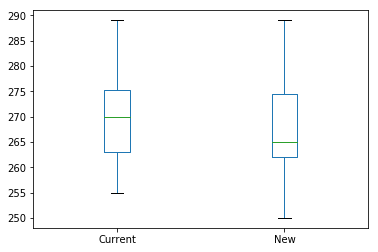

In [32]:
Data.boxplot(grid=False)

Observation:

The 40 values off the total populations provided show that :

The mean,
The minimum,
the maximum, 
25th and 75th percentile 
of driving distances of both current and new balls do not have a major difference in values.

Further tests will be performed to confirm if the values of the mean really have a difference or otherwise

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022651AEB6A0>,
      dtype=object)

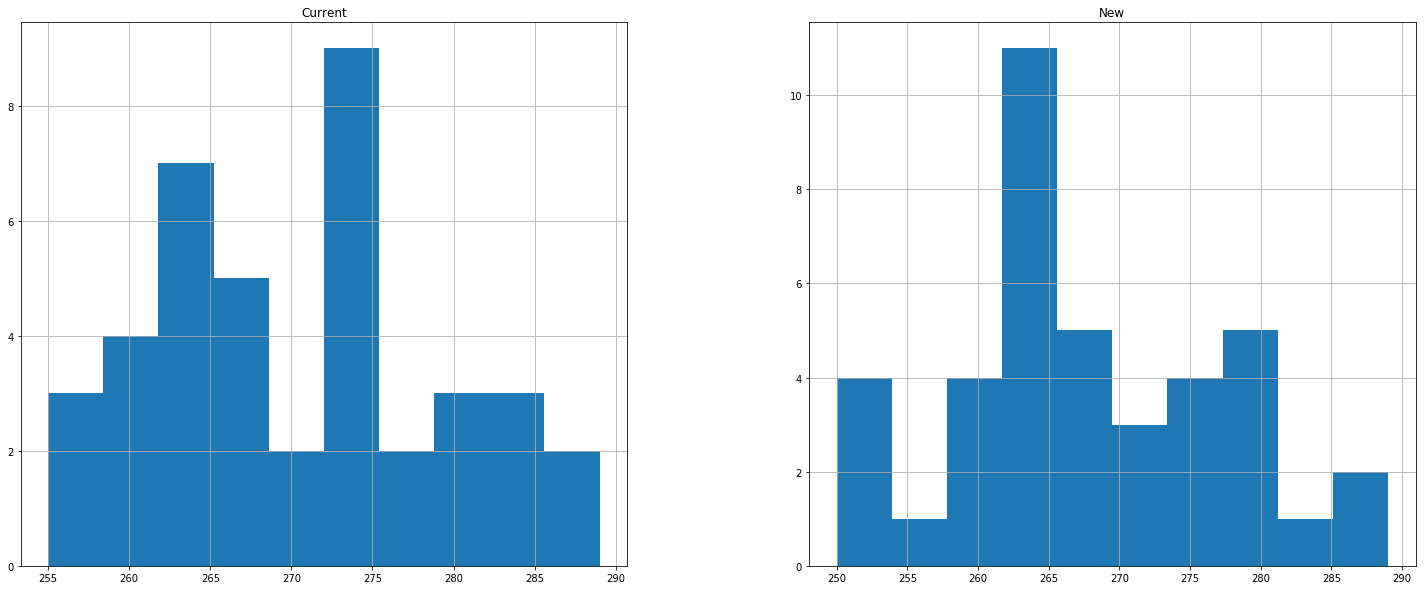

In [17]:
Data.hist(figsize=(25,10))

The Histogram printed above appears as somewhat normally distributed, we will next use Shapiro-Wilk test, to test the normality

In [36]:
#Set Significance Level, a = 0.05

#Shapiro-Wilk test:

# H0 = The data in the given set is normally distributed --> Null Hypothesis
# Ha = The data in the given set is not normally distributed --> Alternative hypothesis

# Do not reject H0 if P > a
# Reject H0 if p <= a

In [33]:
Current = Data['Current']

In [34]:
New = Data['New']

In [35]:
shapiro(Current)

(0.9707046747207642, 0.378787100315094)

For Current data:
P= 0.38 for a = 0.05
Therefore, 

P > a

H0 is not rejected

The values present in the 'current' column is normally distributed

In [37]:
shapiro(New)

(0.9678263664245605, 0.3064655363559723)

For New data: P= 0.31 for a = 0.05 Therefore,

P > a

H0 is not rejected

The values present in the 'New' column is normally distributed

Both the current and the new data is normally distributed as per the shapiro test

In [ ]:
#Next, to test if both current and new values have equal variance, 
#Levene test is to be used for the purpose 

# H0 = The current and new driving distances have equal variance --> Null Hypothesis
# Ha = The current and new driving distances do not have equal variance --> Alternative hypothesis

# Do not reject H0 if P > a
# Reject H0 if p <= a# Set significance level at, a= 0.05

In [38]:
levene(Current,New)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

Result from Levene test:

P= 0.61 for a = 0.05
Therefore, 

P > a

H0 is not rejected

Therefore, 

The current and new driving distances have equal variance

The data is normally distributed and both independent attributes have equal variance, also information on standard deviation is not provided.
Therefore, 
T test can be performed on this data set to compare the means of the driving distance on the current and new golf balls and note if there is any significant difference between them.

In [ ]:
#T-Test :
    
#Significance level, a = 0.05    
# P = pvalue    
# H0 = The mean of the driving distances of the current and the new golf balls ARE SAME. --> Null hypothesis
# Ha = The mean of the driving distances of the current and the new golf balls are NOT the SAME. --> Alternative hypothesis

# Do not reject H0 if P > a
# Reject H0 if p <= a

In [41]:
tstat,pval= ttest_ind(Current,New)

In [43]:
tstat,pval

(1.3283615935245678, 0.18793228491854663)

T- test result :

P = 0.18

P > a

Do not reject H0 if P > a

Therefore, 
The mean of the driving distances of the current and the new golf balls ARE SAME.

Calculate Pooled Standard deviation to obtain Power of the hypothesis test

In [51]:
diff = Current.mean()- New.mean()

In [46]:
sd1 = Current.std()

In [47]:
sd2 = New.std()

In [48]:
psd = np.sqrt(((sd1**2)+(sd2**2))/2)

In [49]:
psd

9.342469200871404

Pooled Standard deviation = 9.342469

Performing Power Analysis for the given sample dataframe :
Power test will be performed to obtain the probability that the hypothesis test performed will correctly reject the null hypothesis when it is infact incorrect

In [54]:
Sample_Power = ttest_power(diff/psd,40,0.05,alternative = 'two-sided')

In [55]:
Sample_Power

0.4492741885390423

Power Test , Observation :

The Power obtained for this sample, Sample_Power = 44.92%

This sample has a high chance of making Type 2 error
Power is sensitive to the size of the outcome and the sample size.
The sample size provided is only of size 40, i.e, the sample power can probably be made better with increase in sample size.

In [ ]:
Final Outcome/ Recommendation to Par Inc. :
    
#1. The mean values of the driving distance of the Current and the new golf ball samples are the same as obtained
    # by applying T-Test on the given sample.
#2. The power of the test can be improved by adding more samples to the existing dataframe.

#Based on the given sample Par Inc., is good to release the new the new golf balls as it provides the cut resistance and is longer lasting along with having no major
#difference in the driving distance.
#The release should have a positive impact on it's market share.
    